In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv(r'C:\Users\Ankit Kumar Singh\Downloads\extended_fmcg_demand_forecasting.csv')

# Preview
print(df.head())
print(df.info())
print(df.describe())

# 2. Handle missing values
df['Sales_Volume'] = df['Sales_Volume'].fillna(0)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Sales_Volume':
        df[col] = df[col].fillna(df[col].median())

# 3. Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 4. Sort & remove duplicates
df = df.sort_values(by=['Product_Category', 'Store_Location', 'Date']).drop_duplicates()


         Date Product_Category  Sales_Volume      Price  Promotion  \
0  2022-01-01        Household          1583   5.190661          0   
1  2022-01-02    Personal Care          1103   8.949596          0   
2  2022-01-03            Dairy           455   4.867987          0   
3  2022-01-04    Personal Care          1107  16.968596          1   
4  2022-01-05    Personal Care          1447   4.309673          1   

  Store_Location  Weekday  Supplier_Cost  Replenishment_Lead_Time  Stock_Level  
0          Urban        5       9.299281                        9          207  
1          Urban        6      13.274109                        5          253  
2          Rural        0      13.302265                        9          245  
3          Urban        1      10.056158                        5          265  
4          Rural        2       3.562862                        8          334  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 

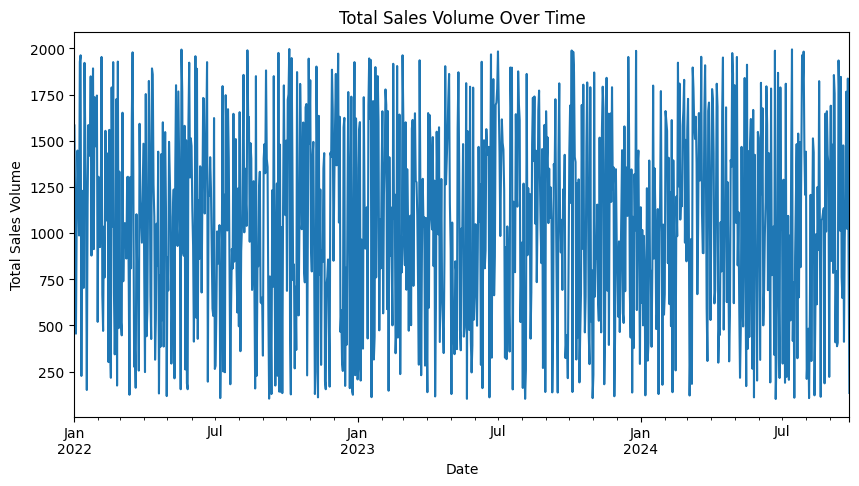

In [11]:
# 5. EDA

## 5.1 Sales trend over time
plt.figure(figsize=(10,5))
df.groupby('Date')['Sales_Volume'].sum().plot(title="Total Sales Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Volume")
plt.show()

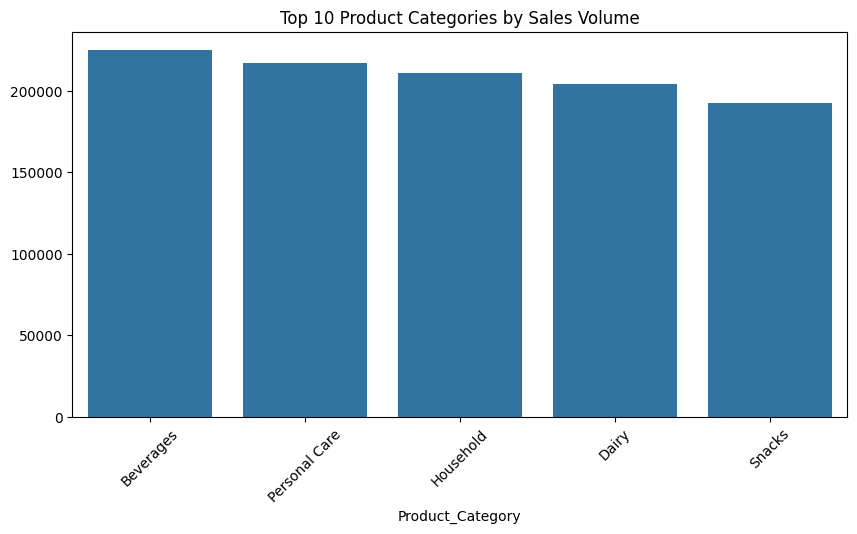

In [12]:
## 5.2 Top 10 Product Categories
plt.figure(figsize=(10,5))
top_categories = df.groupby('Product_Category')['Sales_Volume'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("Top 10 Product Categories by Sales Volume")
plt.xticks(rotation=45)
plt.show()

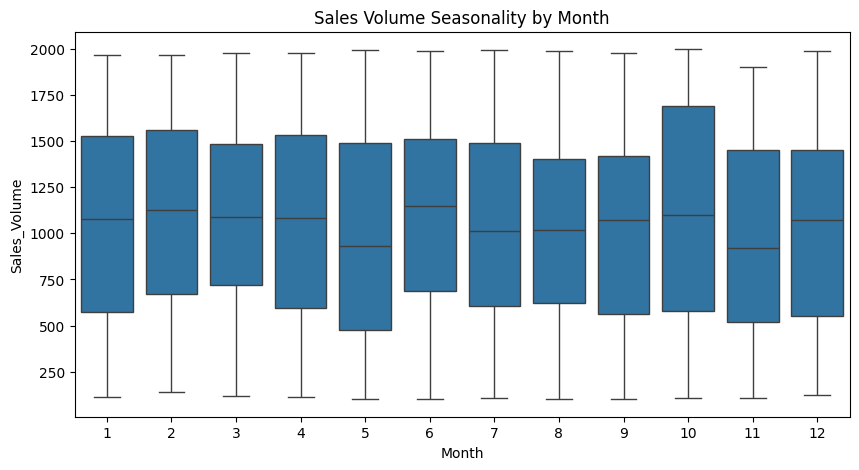

In [13]:
## 5.3 Seasonality by month
plt.figure(figsize=(10,5))
sns.boxplot(x='Month', y='Sales_Volume', data=df.assign(Month=df['Date'].dt.month))
plt.title("Sales Volume Seasonality by Month")
plt.show()

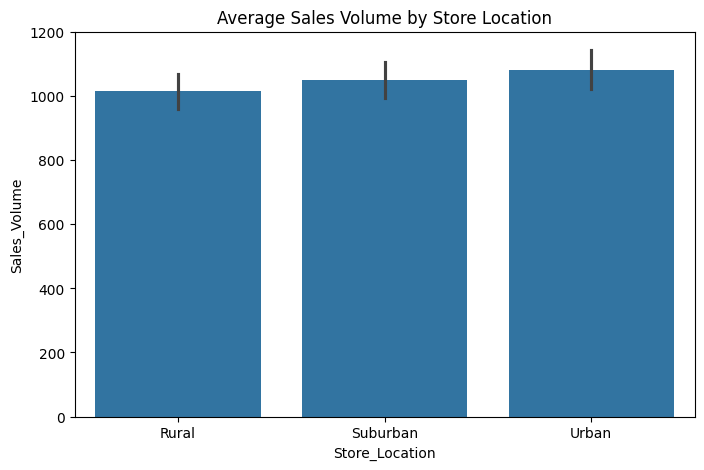

In [14]:
## 5.4 Sales by store location
plt.figure(figsize=(8,5))
sns.barplot(x='Store_Location', y='Sales_Volume', data=df)
plt.title("Average Sales Volume by Store Location")
plt.show()

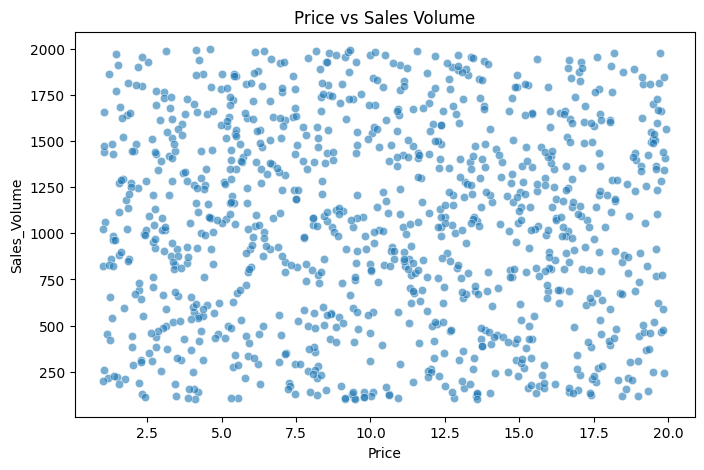

In [15]:
## 5.5 Price vs Sales (price sensitivity)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Price', y='Sales_Volume', data=df, alpha=0.6)
plt.title("Price vs Sales Volume")
plt.show()

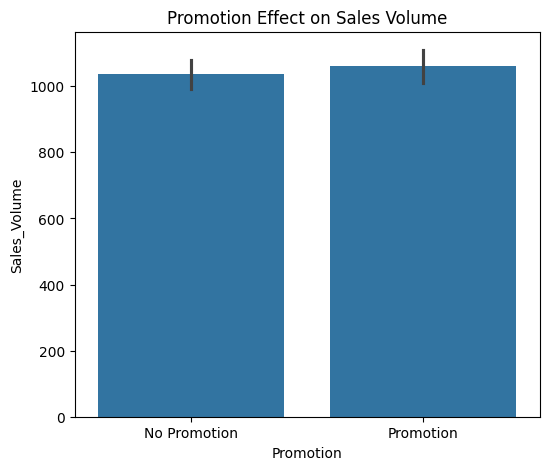

In [16]:

## 5.6 Promotion impact on sales
plt.figure(figsize=(6,5))
sns.barplot(x='Promotion', y='Sales_Volume', data=df)
plt.title("Promotion Effect on Sales Volume")
plt.xticks([0,1], ['No Promotion', 'Promotion'])
plt.show()

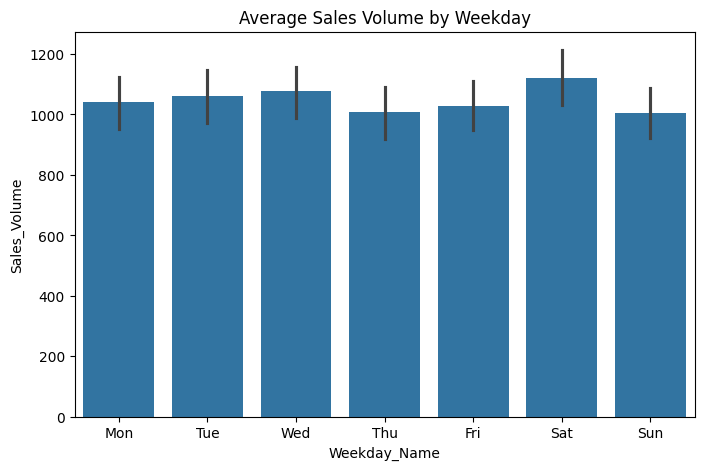

In [17]:

## 5.7 Weekday sales pattern
plt.figure(figsize=(8,5))
weekday_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Weekday_Name'] = df['Weekday'].map(weekday_map)
sns.barplot(x='Weekday_Name', y='Sales_Volume', data=df,
            order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title("Average Sales Volume by Weekday")
plt.show()

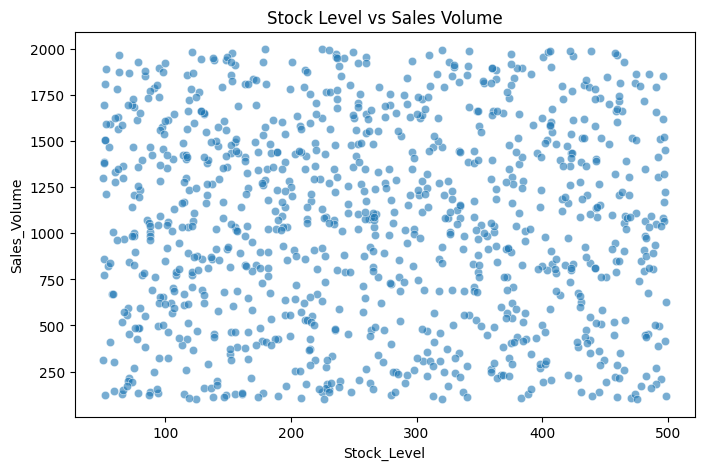

In [18]:
## 5.8 Stock level vs Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x='Stock_Level', y='Sales_Volume', data=df, alpha=0.6)
plt.title("Stock Level vs Sales Volume")
plt.show()

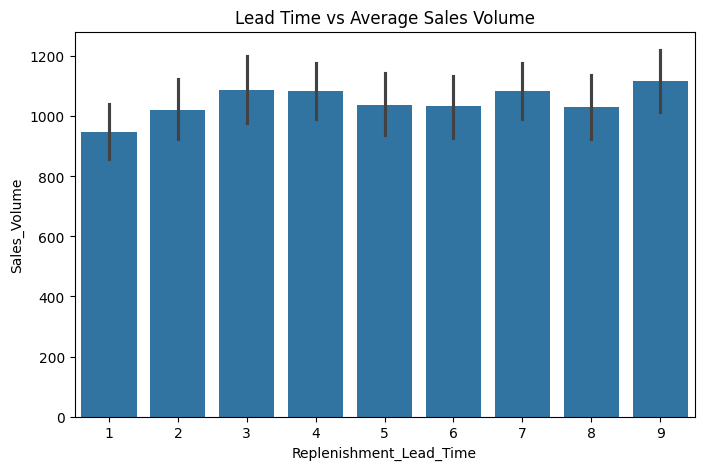

In [19]:
## 5.9 Lead time vs Sales
plt.figure(figsize=(8,5))
sns.barplot(x='Replenishment_Lead_Time', y='Sales_Volume', data=df)
plt.title("Lead Time vs Average Sales Volume")
plt.show()

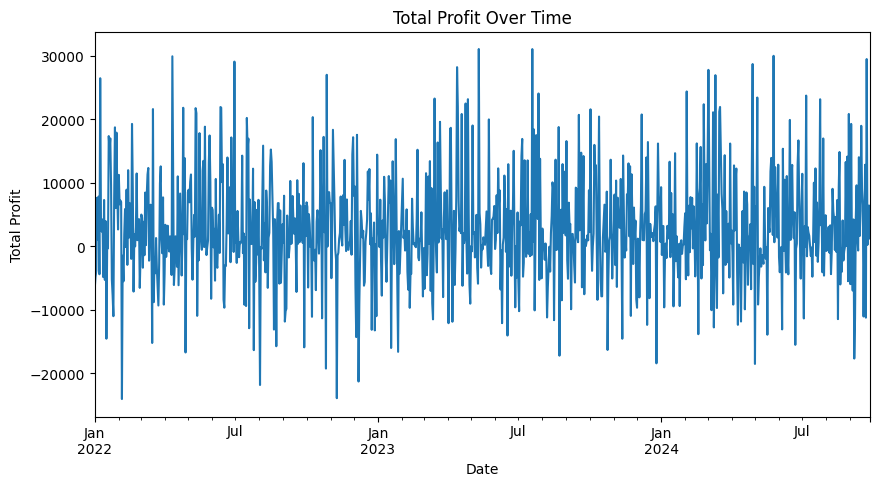

In [20]:
## 5.10 Profit margin analysis
df['Profit'] = (df['Price'] - df['Supplier_Cost']) * df['Sales_Volume']
plt.figure(figsize=(10,5))
df.groupby('Date')['Profit'].sum().plot(title="Total Profit Over Time")
plt.xlabel("Date")
plt.ylabel("Total Profit")
plt.show()